First import all the modules needed

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
import seaborn as sns # for the heatmap
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)}) # show all floats to 3 dec. pts

In [2]:
import pandas as pd
import numpy as np
# load the csv file containing the values
# , and r unnecessary 
data2 = pd.read_csv(r'C:\Users\JK\Desktop\MLfMS_Project\spectraldata.csv', delimiter=',')
#make a smaller df to play with values
trydata = data2[0:50]

In [3]:
# separate labels (only 1st columns values)
# labels = np.unique(trydata.iloc[:, :1].values)
labels = trydata.iloc[:, :1].values
# from values (everything but the first column)
values = trydata.iloc[:, 1:].values
# if needed the column labels
exp = trydata.columns.values.tolist()
exp = exp[1:]

In [4]:
# now as ment by Kunal
values

array([[96.882, 98.633, 99.788, ..., 99.831, 99.952, 100.652],
       [91.822, 92.999, 92.747, ..., 97.814, 97.453, 98.462],
       [92.825, 96.115, 96.536, ..., 98.170, 98.127, 97.388],
       ...,
       [103.091, 103.080, 102.219, ..., 102.891, 100.326, 101.131],
       [99.117, 97.830, 105.291, ..., 95.555, 97.753, 97.742],
       [103.839, 104.849, 106.347, ..., 102.987, 102.387, 102.802]])

### Transpose if needed, see below:

https://stats.stackexchange.com/questions/248825/why-do-we-need-to-take-the-transpose-of-the-data-for-pca

In [13]:
# seems that it's needed to transpose the data so that we have 1024 row and 50 columns
valuestrans = np.transpose(values)
valuestrans.shape

(1024, 50)

### Normalize the data

In [4]:
#print(data)
scaled = StandardScaler().fit_transform(values)
# pick some column to see [:,1] means second column and [:1,] firts row
print(scaled[:,1])

# check that mean~0 and std~1
np.mean(scaled),np.std(scaled)

[0.261 -1.260 -0.419 -1.297 -2.091 -2.592 -1.324 -1.552 0.883 0.338 0.463
 -0.218 -0.061 -0.518 -0.475 -0.263 0.156 0.223 -0.087 1.132 0.161 0.101
 0.474 0.298 0.926 0.220 0.134 -0.411 0.596 0.005 -0.333 0.278 0.217 0.142
 -0.277 0.045 0.430 0.536 0.759 1.388 -0.194 1.727 -2.373 1.257 -1.774
 -0.827 1.755 1.461 0.044 1.939]


(2.1131534022611475e-16, 1.0)

In [5]:
len(scaled[:,1])

50

### Create the PCA model below, including maximal information.

In [6]:
pca = PCA(n_components=10)
pfit = pca.fit(scaled)
# 
# % Contribution of each PC to the total dataset variance
print(pca.explained_variance_ratio_)

[0.769 0.158 0.012 0.007 0.005 0.005 0.004 0.004 0.003 0.003]


In [17]:
# Amount of data variance explained by each PC 
print(pca.explained_variance_)

[24.898 4.115 2.169 1.819 1.284 1.164 1.049 0.927 0.899 0.796]


In [7]:
#checking shape tells us it has 2 rows, one for each principal component and 50 columns, 
# proportion of each of the feature - See more at: https://shankarmsy.github.io/posts/pca-sklearn.html#sthash.yLZ9qzzb.dpuf
pca.components_.shape

(10, 1024)

In [45]:

# Print out two first principal components
print(pca.components_[:,0])
print(pca.components_[:,1])

[-0.022 -0.317 -0.162 0.080 -0.080 0.107 -0.267 0.176 0.084 0.102]
[-0.150 -0.218 -0.036 -0.094 -0.051 -0.011 -0.141 0.056 0.001 0.001]


In [8]:
# Here, we try to obtain the normalized cumulative sum (cumsum) of eigenvalues
# assuming pca.explained_variance_ratio_ are the eigenvalues from PCA
idc = np.divide(np.cumsum(pca.explained_variance_ratio_),np.sum(pca.explained_variance_ratio_)) 
print(idc)

[0.791 0.954 0.966 0.974 0.980 0.985 0.989 0.993 0.997 1.000]


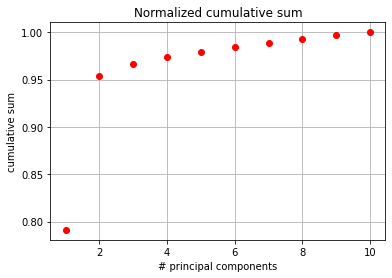

In [9]:
# We plot normalized cumulative sum to understand the contributions of the obtained PCs
plt.title('Normalized cumulative sum')
plt.xlabel('# principal components')
plt.ylabel('cumulative sum')

# The plot shows that PC1-6 explain all data variance.
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),idc,'ro') # re-plot the data

plt.grid()
plt.show()

[24.898 4.115 2.169 1.819 1.284 1.164 1.049 0.927 0.899 0.796]
[0.497 0.082 0.043 0.036 0.026 0.023 0.021 0.019 0.018 0.016]


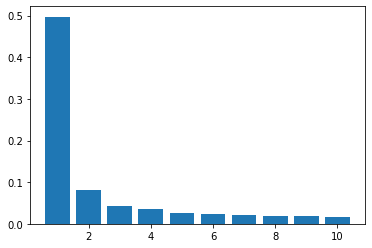

In [48]:
# Plot explained variance
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

# The plot shows PC1 explains most of the variance. PC 2 something, 3-4 equal, drop and 5-10 equal
plt.bar([1,2,3,4,5,6,7,8,9,10], pca.explained_variance_ratio_)
plt.show()

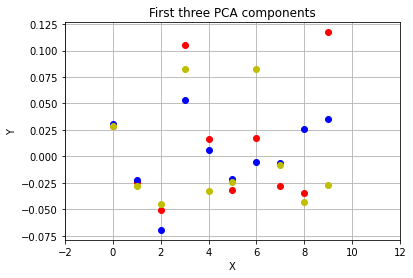

In [15]:
# This is for visualization, to get an overview how the PC's are distributed

#Setting the plot parameters --> naming
plt.title("First three PCA components")
plt.xlabel("X")
plt.ylabel("Y")

# what are the values to be used? [0] or [:,0:]
plt.plot(pca.components_[:,0], "ro")
plt.plot(pca.components_[:,1], "bo") 
plt.plot(pca.components_[:,3], "yo")
#plt.ylim(bottom=-1.0, top=2)
plt.xlim(left=-2, right=12)
#plt.plot(pca.components_[:,3], "yo")
#draw the plot
plt.grid()
plt.show()

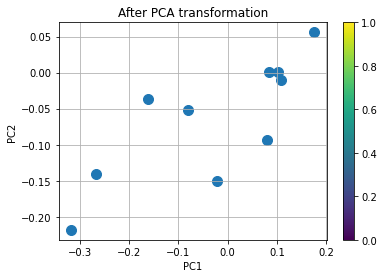

In [53]:
# What is this???

plt.scatter(pca.components_[:,0],pca.components_[:,1], s=100)

plt.title('After PCA transformation')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.grid()
plt.colorbar()
plt.show()

In [17]:
# What does the picture actually tell??


plt.figure(figsize=(10,5))
#grid_kws = {"height_ratios": (10, 1), "hspace": 1}
#f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)

# Produce heatmap
ax = sns.heatmap(pca2.components_, 
                 #ax=ax,
                 #cbar_ax=cbar_ax,
                 cmap='PiYG',  # Also YlGnBu, RdBu
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca2.n_components_+1)],
                 xticklabels=list(labels),
                 cbar_kws={"orientation": "horizontal"}
                )
plt.yticks(rotation=0, fontsize=10)
plt.xticks(rotation=0, fontsize=5)
plt.tight_layout()

NameError: name 'pca' is not defined

<Figure size 720x360 with 0 Axes>

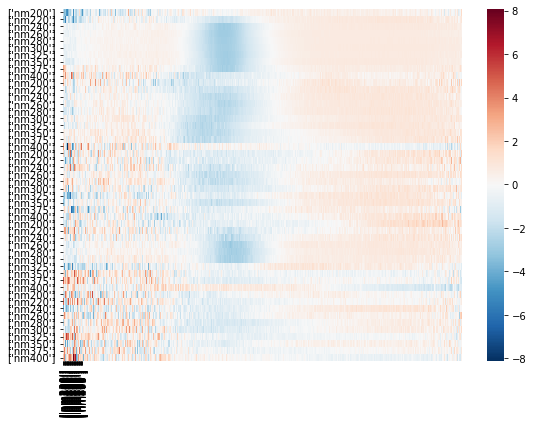

In [80]:
# Plot all datapoints before PCA transformation
# This map shows dependencies for every experiment
plt.figure(figsize=(8,6))
ax = sns.heatmap(scaled.transpose(),
                 cmap='RdBu_r',  # Also YlGnBu, RdBu
                 xticklabels=list(exp[1:10]),
                 yticklabels=list(labels),
                )
plt.tight_layout()

C:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


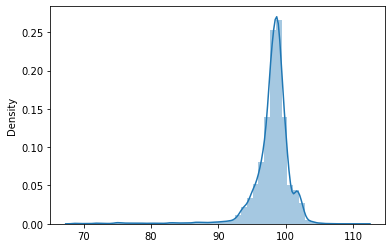

In [29]:
ax = sns.distplot(values)

In [5]:
#scipyllä
from scipy.fft import fft

fourier = fft(values)

# numpy normalization, en tiedä mikä parametri kannattaa valita (norm =). Kokeilin kaikilla 
fourierized2 = np.fft.fft(values, norm = 'forward')


array([[99.782, 0.196, 0.097, ..., 0.088, 0.097, 0.196],
       [97.039, 0.591, 0.292, ..., 0.368, 0.292, 0.591],
       [95.921, 1.546, 1.054, ..., 1.018, 1.054, 1.546],
       ...,
       [100.964, 0.260, 0.121, ..., 0.182, 0.121, 0.260],
       [96.665, 0.245, 0.041, ..., 0.057, 0.041, 0.245],
       [102.415, 0.284, 0.113, ..., 0.103, 0.113, 0.284]])

C:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


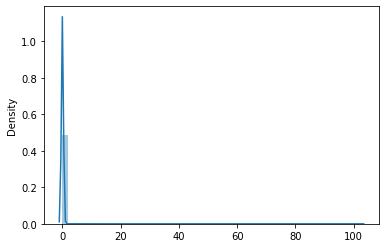

In [28]:
ax = sns.distplot(np.abs(fourierized2))

In [8]:
#print(data)

# you could try this with abs values, doesen't work with imaginary part

scaledf = StandardScaler().fit_transform(np.abs(fourierized2))

# pick some PCA to see values: i.e. [:,1] 2nd row, 2nd column [:1,]
# ros are the PCA's
print(scaledf[:,1])

# check that mean~0 and std~1
print(np.mean(fourierized2),np.std(fourierized2), np.mean(scaledf), np.std(scaledf))

[-0.517 -0.090 0.941 2.735 3.248 3.652 2.791 1.533 -0.035 -0.460 -0.470
 -0.319 -0.071 0.105 0.171 0.114 0.120 0.153 -0.129 -0.643 -0.524 -0.555
 -0.582 -0.348 -0.473 -0.455 -0.501 -0.347 -0.615 -0.539 -0.521 -0.569
 -0.472 -0.233 -0.044 -0.356 -0.532 -0.610 -0.628 -0.488 -0.548 -0.444
 -0.023 -0.500 -0.109 -0.196 -0.285 -0.447 -0.464 -0.422]
(0.09502386505527216-6.071532165918825e-20j) 3.060002963464353 -2.6645352591003756e-17 0.9999999999999999


C:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


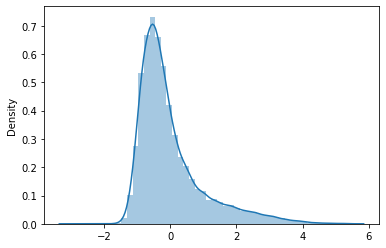

In [26]:
ax = sns.distplot(scaledf)

In [10]:
pca2 = PCA(n_components=10)
pfit2 = pca2.fit(scaledf)

# % Contribution of each PC to the total dataset variance
print(pfit2.explained_variance_ratio_)      

[0.443 0.078 0.044 0.040 0.037 0.034 0.031 0.029 0.028 0.025]


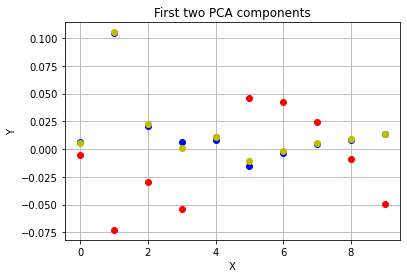

In [30]:
# This is for visualization, to get an overview how the PC's are distributed

#Setting the plot parameters --> naming
plt.title("First three PCA components")
plt.xlabel("X")
plt.ylabel("Y")

# what are the values to be used? [0] or [:,0:]
plt.plot(pca2.components_[:,0], "ro")
plt.plot(pca2.components_[:,1], "bo") 
plt.plot(pca2.components_[:,3], "yo")
#draw the plot
plt.grid()
plt.show()

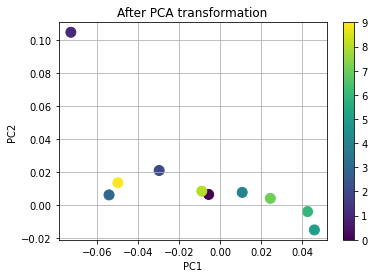

In [50]:
# What is this???
q = range(0, len(pca2.components_))

plt.scatter(pca2.components_[:,0],pca2.components_[:,1], c = q, s=100)

plt.title('After PCA transformation')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.grid()
plt.colorbar()
plt.show()

In [31]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy
import pickle
#from dscribe.descriptors import MBTR
from ase.visualize import view

In [47]:
type(exp)
q = range(0, len(values))

In [43]:
q

range(1, 1024)

C:\Python\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Python\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


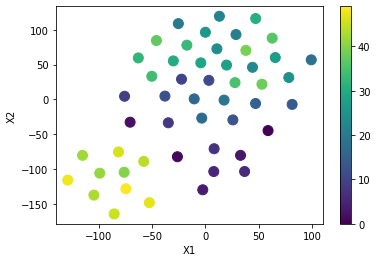

In [48]:
comp = TSNE(n_components=2).fit_transform(scaledf)
#q = numpy.genfromtxt('q_value.csv', delimiter=',')

# plot the resulting 2D points
#plt.plot(comp[:,0],comp[:,1],'ko')
plt.scatter(comp[:,0],comp[:,1],c=q, s=100)
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar()
plt.show()

In [36]:
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]       
for t,j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])


ax.legend(fontsize='small')
plt.show()

No handles with labels found to put in legend.


C:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


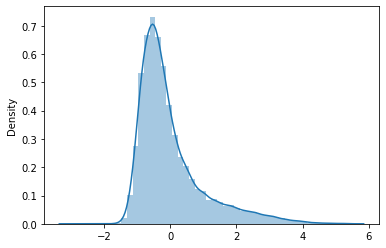

In [25]:
ax = sns.distplot(scaledf)

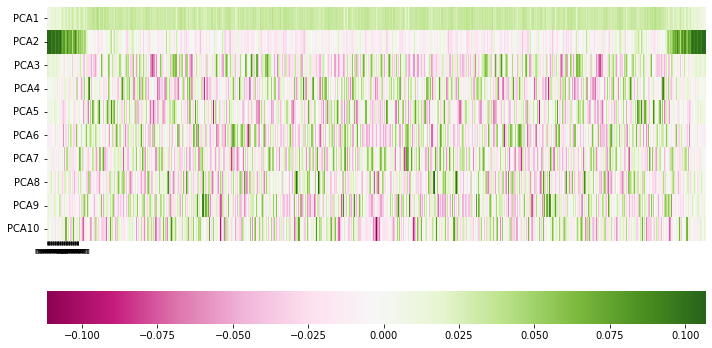

In [18]:
# What does the picture actually tell??


plt.figure(figsize=(10,5))
#grid_kws = {"height_ratios": (10, 1), "hspace": 1}
#f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)

# Produce heatmap
ax = sns.heatmap(pca2.components_, 
                 #ax=ax,
                 #cbar_ax=cbar_ax,
                 cmap='PiYG',  # Also YlGnBu, RdBu
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca2.n_components_+1)],
                 xticklabels=list(labels),
                 cbar_kws={"orientation": "horizontal"}
                )
plt.yticks(rotation=0, fontsize=10)
plt.xticks(rotation=0, fontsize=5)
plt.tight_layout()

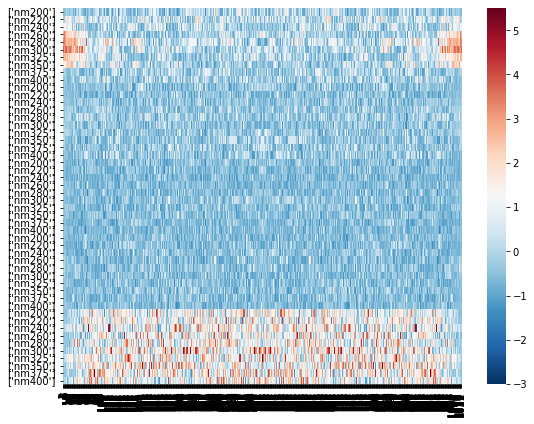

In [24]:
# Plot all datapoints before PCA transformation
# This map shows dependencies for every experiment
plt.figure(figsize=(8,6))
ax = sns.heatmap(scaledf,
                 cmap='RdBu_r',  # Also YlGnBu, RdBu
                 xticklabels=list(range(1,1024)),
                 yticklabels=list(labels),
                )
plt.tight_layout()

See this:
https://www.kite.com/python/answers/how-to-plot-a-power-spectrum-in-python